In [1]:
%matplotlib inline
#Disable warnings
import warnings
warnings.filterwarnings('ignore')

# import libraries for dataset 
import pandas as pd
import yfinance as yf
from yahoofinancials import YahooFinancials
import matplotlib.pyplot as plt
import matplotx
import seaborn as sns

# Preparing the data 
The dataframe stocks_2023 is the Close price of stocks from the yfiance database. The list of tickers comes from the 100 Best Stocks 2023 Investor Business Daily. The dataframe, stocks_2023 did not have any null values leaving intact the 101 columns and 250 dates. 

In [2]:
# Create a list from excel column
best_100_stocks = pd.read_excel('/Users/jmoreno/Documents/DataScience_Transition/Stocks_2023_Project/2023_Best_100_Stocks.xlsx')
ticker_symbol = list(best_100_stocks['Ticker'])
ticker_industry = best_100_stocks[['Ticker', 'Industry']]

In [3]:
#import stocks only from 2023 
stocks_2023_original = yf.download(tickers = ticker_symbol, start= '2023-01-01', end='2023-12-31', progress= False)

In [4]:
#stocks_2023_original.info(verbose=True, show_counts=True)

In [5]:
stocks_2023 = stocks_2023_original[['Close']].copy().reset_index()
#print(stocks_2023)

In [6]:
stocks_2023 = stocks_2023.droplevel(0, axis=1)
stocks_2023.head()

Ticker,,ALTR,AMD,AMPH,AMR,AMWD,ANET,ANF,APG,AVGO,...,VERX,VIST,VRNS,VRT,WFRD,WING,WOR,X,XPO,ZS
0,2023-01-03,46.349998,64.019997,28.200001,137.339996,49.320000,120.910004,23.600000,18.670000,553.479980,...,14.61,14.37,24.035000,13.30,48.400002,133.440002,30.289766,25.040001,32.349998,110.190002
1,2023-01-04,47.139999,64.660004,27.990000,138.710007,51.389999,113.839996,25.209999,18.730000,560.239990,...,14.76,14.17,24.450001,13.50,47.389999,136.500000,30.283600,25.230000,33.400002,111.589996
2,2023-01-05,45.599998,62.330002,28.120001,141.070007,50.180000,109.489998,24.740000,18.450001,555.020020,...,12.96,14.78,22.840000,13.53,49.270000,132.309998,30.813810,25.450001,34.009998,104.389999
3,2023-01-06,46.950001,63.959999,28.850000,151.660004,51.560001,112.449997,25.200001,19.080000,588.429993,...,12.49,14.73,23.139999,14.12,49.889999,137.220001,32.114674,26.900000,35.990002,103.959999
4,2023-01-09,48.160000,67.239998,28.040001,151.820007,51.340000,114.870003,27.400000,18.950001,576.890015,...,12.99,15.74,23.770000,14.82,51.110001,143.850006,31.602959,26.469999,37.480000,104.750000


In [7]:
# Add the name "Date" to the first column
stocks_2023 = stocks_2023.rename(columns={'':'Date'})
#stocks_2023['Date']

In [8]:
stocks_2023.head()

Ticker,Date,ALTR,AMD,AMPH,AMR,AMWD,ANET,ANF,APG,AVGO,...,VERX,VIST,VRNS,VRT,WFRD,WING,WOR,X,XPO,ZS
0,2023-01-03,46.349998,64.019997,28.200001,137.339996,49.320000,120.910004,23.600000,18.670000,553.479980,...,14.61,14.37,24.035000,13.30,48.400002,133.440002,30.289766,25.040001,32.349998,110.190002
1,2023-01-04,47.139999,64.660004,27.990000,138.710007,51.389999,113.839996,25.209999,18.730000,560.239990,...,14.76,14.17,24.450001,13.50,47.389999,136.500000,30.283600,25.230000,33.400002,111.589996
2,2023-01-05,45.599998,62.330002,28.120001,141.070007,50.180000,109.489998,24.740000,18.450001,555.020020,...,12.96,14.78,22.840000,13.53,49.270000,132.309998,30.813810,25.450001,34.009998,104.389999
3,2023-01-06,46.950001,63.959999,28.850000,151.660004,51.560001,112.449997,25.200001,19.080000,588.429993,...,12.49,14.73,23.139999,14.12,49.889999,137.220001,32.114674,26.900000,35.990002,103.959999
4,2023-01-09,48.160000,67.239998,28.040001,151.820007,51.340000,114.870003,27.400000,18.950001,576.890015,...,12.99,15.74,23.770000,14.82,51.110001,143.850006,31.602959,26.469999,37.480000,104.750000


In [9]:
#stocks_2023.columns

In [10]:
#Get null count values 
stocks_2023.isna().sum().reset_index(name='nan_count').describe()

,nan_count
count,101.0
mean,0.0
std,0.0
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,0.0


In [11]:
#stocks_2023.info(verbose=True, show_counts=True)

In [12]:
# Get descriptive stats
stocks_2023.describe()

Ticker,Date,ALTR,AMD,AMPH,AMR,AMWD,ANET,ANF,APG,AVGO,...,VERX,VIST,VRNS,VRT,WFRD,WING,WOR,X,XPO,ZS
count,250,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,...,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,2023-07-02 09:18:43.200000,66.859960,103.029360,46.108840,193.190159,66.383040,170.298520,43.091200,25.322200,783.120561,...,20.701680,23.662240,29.581060,26.937280,74.516480,187.175700,40.106841,28.892960,58.087800,144.487420
min,2023-01-03 00:00:00,45.599998,62.330002,27.990000,134.970001,48.029999,109.489998,21.830000,18.450001,553.479980,...,12.000000,14.170000,22.440001,12.180000,47.389999,132.309998,30.283600,20.799999,29.830000,87.000000
25%,2023-04-03 06:00:00,62.607499,89.917503,37.220000,156.742500,53.582500,147.252495,27.612500,22.224999,626.970016,...,18.735000,19.825001,25.547501,15.050000,60.109999,168.262505,36.570592,24.615000,38.095000,118.887497
50%,2023-07-04 00:00:00,68.095001,105.224998,45.880001,167.934998,70.375000,167.240005,36.285002,25.475000,831.290009,...,20.920000,24.175000,27.224999,24.474999,68.649998,182.630005,38.144266,28.255000,59.075001,144.525002
75%,2023-10-01 06:00:00,72.315001,113.939999,55.777501,222.234993,75.067499,188.074997,55.100000,27.974999,884.157516,...,22.807499,27.287499,31.395000,38.377500,90.672503,199.382500,43.568127,32.087499,73.410000,159.065002
max,2023-12-29 00:00:00,84.419998,148.759995,65.000000,353.290009,93.730003,238.809998,93.190002,34.779999,1147.000000,...,29.500000,32.590000,45.660000,49.430000,101.260002,260.390015,58.880001,49.590000,90.309998,225.020004
std,NaN,7.497069,17.767688,10.193385,51.739206,12.235956,31.076675,19.073083,3.605910,152.595715,...,4.092349,4.886293,5.874346,12.160645,15.698831,27.538992,5.841998,5.802048,19.056668,31.674400


In [13]:
# Make list of tickers to use to plot
tickers= stocks_2023.columns.to_list()
tickers=tickers[1:]
#tickers

In [14]:
#stocks_2023.columns

# Initial Visuals
The first graph displays the top 5 highest closing prices of 2023. The top 5 stocks are “MELI”, “FICO”, ”AVGO”, “LRCX”, “HUBS”, and, “NVDA”. 
Since this graph alone will not inform the viewer how much the stock has grown relative to the starting price at the beginning of 2023, the following graphs have normalized data with a starting value of 100. 
The top 5 stocks of the normalized graph plot are “ANF”, “VRT”, “NVDA”, “SMCI”, and “DUOL”. Note that none of these stocks were the original top 5 stocks before the data was normalized. 


In [15]:
#Find the columns(tickers) with over 500 
stocks_2023_no_dates = stocks_2023.iloc[:,1:]
columns_over_500 = list(stocks_2023_no_dates.iloc[249,:]>500)
tickers_over_500 = stocks_2023_no_dates.iloc[249, columns_over_500].to_frame(name='Price').reset_index()
print(tickers_over_500)
tickers_over_500=tickers_over_500['Ticker'].to_list()

  Ticker        Price
0   AVGO  1116.250000
1   FICO  1164.010010
2   HUBS   580.539978
3   LRCX   783.260010
4   MELI  1571.540039


In [16]:
tickers_over_500

['AVGO', 'FICO', 'HUBS', 'LRCX', 'MELI']

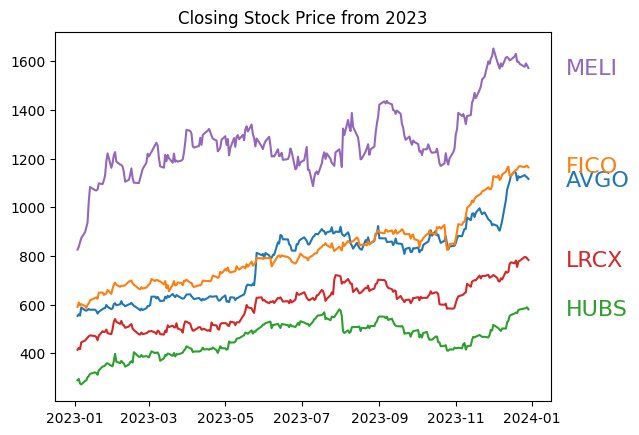

In [17]:
# Graph of all stocks with the top 6 highest closing price at the end of 2023
for i in tickers:
    if i in tickers_over_500:
        plt.plot(stocks_2023['Date'],stocks_2023[i], label=i)

        
plt.title('Closing Stock Price from 2023')
matplotx.line_labels(fontsize=16, fontstyle= 'normal') # labels line to the right in color 


In [18]:
# Normalize the data by dividing the each stock by it's first value in 2023
normalized_stocks_2023= (stocks_2023.iloc[:,1:]/(stocks_2023.iloc[0])*100).astype(float)
normalized_stocks_2023.head()

Ticker,ALTR,AMD,AMPH,AMR,AMWD,ANET,ANF,APG,AVGO,AZEK,...,VERX,VIST,VRNS,VRT,WFRD,WING,WOR,X,XPO,ZS
0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
1,101.704425,100.999699,99.255316,100.997532,104.197080,94.152670,106.822028,100.321368,101.221365,106.691978,...,101.026698,98.608213,101.726652,101.503758,97.913219,102.293164,99.979642,100.758780,103.245759,101.270527
2,98.381877,97.360208,99.716312,102.715896,101.743716,90.554954,104.830506,98.821643,100.278247,103.322263,...,88.706368,102.853165,95.028085,101.729320,101.797518,99.153174,101.730103,101.637380,105.131375,94.736362
3,101.294503,99.906283,102.304963,110.426684,104.541771,93.003055,106.779663,102.196036,106.314594,105.220695,...,85.489391,102.505217,96.276262,106.165411,103.078508,102.832733,106.024831,107.428110,111.251942,94.346126
4,103.905073,105.029680,99.432625,110.543186,104.095702,95.004548,116.101691,101.499736,104.229608,107.783576,...,88.911705,109.533750,98.897444,111.428568,105.599171,107.801262,104.335432,105.710856,115.857809,95.063071


In [19]:
#Check new normalized df
#normalized_stocks_2023.info(verbose= True, show_counts=True)

In [20]:
# Add data column to the beginning of the dateframe
normalized_stocks_2023.drop('Date',axis=1,inplace=True) #Date was a null column 
normalized_stocks_2023.insert(0,'Date',stocks_2023['Date'])
normalized_stocks_2023.tail()

Ticker,Date,ALTR,AMD,AMPH,AMR,AMWD,ANET,ANF,APG,AVGO,...,VERX,VIST,VRNS,VRT,WFRD,WING,WOR,X,XPO,ZS
245,2023-12-22,179.697958,218.056878,216.028356,247.480722,187.956199,197.055651,392.288137,183.824315,202.713742,...,184.394259,207.654839,187.601416,366.766903,199.566102,193.472728,192.903437,191.573480,276.692446,201.179769
246,2023-12-26,181.100335,224.008140,221.666655,253.043547,190.004054,196.451899,387.966085,185.806098,204.504238,...,181.314171,208.072372,189.016021,368.345872,209.214874,194.072240,194.356068,193.091041,278.578074,203.820666
247,2023-12-27,181.747574,228.163097,223.156023,257.237526,190.044615,196.617309,387.245754,186.127476,203.470782,...,183.299119,207.863612,188.932807,367.894734,208.016523,195.136398,194.389090,194.129388,277.959822,204.210908
248,2023-12-28,182.135924,232.364890,220.460980,252.919757,190.004054,195.988747,381.398308,186.288156,202.791442,...,185.420950,203.201120,189.972957,368.120289,204.442136,193.255396,191.087645,194.329066,278.299855,203.684543
249,2023-12-29,181.553407,230.256188,219.326230,246.774445,188.260339,194.781232,373.813558,185.324040,201.678478,...,184.394259,205.358389,188.391925,361.127805,202.128097,192.281161,189.998162,194.289136,270.757343,201.070871


In [21]:
#Create the list of the top 6 of the normalized tickers at the end of 2023
over_350_stocks = list(normalized_stocks_2023.iloc[249,1:]>318)
normalized_stocks_no_dates= normalized_stocks_2023.iloc[:,1:]
normalized_top6_tickers=normalized_stocks_no_dates.iloc[249,over_350_stocks].reset_index(name='Price')
normalized_top6_tickers = list(normalized_top6_tickers['Ticker'])
normalized_top6_tickers

['ANF', 'DUOL', 'NVDA', 'SMCI', 'VRT']

In [22]:
#normalized_stocks_2023

 The table below demonstrates the potential volatility of the high that stocks like “ANF”, “VRT”, “NVDA”, and “SMCI” have with a standard deviation of over $75. To further analyze this relationship between the mean and the standard deviation, the next section will include scatter plots of variations with all the stocks and the top 5 stocks with normalized data.

In [23]:
# Show the descriptive statistics of the top 5 normalized stocks
normalized_top5_describe = normalized_stocks_2023[normalized_top6_tickers].describe().round(1)
normalized_top5_describe[1:3]

Ticker,ANF,DUOL,NVDA,SMCI,VRT
mean,182.6,207.3,255.5,243.3,202.5
std,80.8,54.5,75.1,103.4,91.4


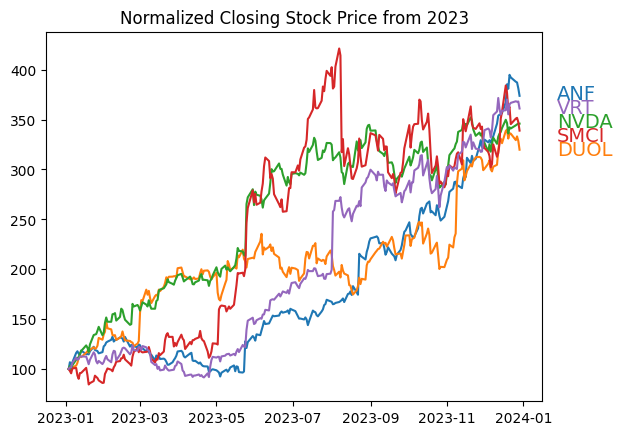

In [24]:
#Graph Top 6 Normalized Graphs
for i in normalized_top6_tickers:
        plt.plot(normalized_stocks_2023['Date'],normalized_stocks_2023[i], label=i)
        
plt.title('Normalized Closing Stock Price from 2023')
matplotx.line_labels(fontsize=14, fontstyle= 'normal')

# Analysis
The following scatter plots use a table with the daily percent change of each stock. The x-axis is the mean of daily percentage change and the y-axis is the standard deviation of the daily percent change. The plot is divided into four quadrants determined by the third quartile of the mean and standard deviation. The top left quadrant represents the highest profit with the lowest risk. The stocks in this quadrant are ‘NVDA’, ‘SKYW’, ‘CAMT’, ‘XPO’, ‘STRL’, AMR’, ‘BLDR’, ‘CRWD’, ‘META, ‘RCL’, ‘FTAI’, and ‘MHO’. Except for ‘NVDA’, none of these stocks were in the top 5 normalized stocks.

In [25]:
# Create a dataframe that contains the daily percent change
daily_percent_change = pd.DataFrame()

for i in tickers:
    daily_percent_change[i] = normalized_stocks_2023[i].pct_change().mul(100).round(2)

daily_percent_change= daily_percent_change.iloc[1:,:]
daily_percent_change.head()

,ALTR,AMD,AMPH,AMR,AMWD,ANET,ANF,APG,AVGO,AZEK,...,VERX,VIST,VRNS,VRT,WFRD,WING,WOR,X,XPO,ZS
1,1.70,1.00,-0.74,1.00,4.20,-5.85,6.82,0.32,1.22,6.69,...,1.03,-1.39,1.73,1.50,-2.09,2.29,-0.02,0.76,3.25,1.27
2,-3.27,-3.60,0.46,1.70,-2.35,-3.82,-1.86,-1.49,-0.93,-3.16,...,-12.20,4.30,-6.58,0.22,3.97,-3.07,1.75,0.87,1.83,-6.45
3,2.96,2.62,2.60,7.51,2.75,2.70,1.86,3.41,6.02,1.84,...,-3.63,-0.34,1.31,4.36,1.26,3.71,4.22,5.70,5.82,-0.41
4,2.58,5.13,-2.81,0.11,-0.43,2.15,8.73,-0.68,-1.96,2.44,...,4.00,6.86,2.72,4.96,2.45,4.83,-1.59,-1.60,4.14,0.76
5,1.54,1.20,0.21,-2.81,0.97,0.31,1.46,1.00,-0.34,1.19,...,-2.31,-0.95,1.81,-2.02,1.62,2.53,4.86,4.61,-0.48,0.21


In [26]:
# Calculate the mean and std of each stock 
daily_percent_mean_std=daily_percent_change.describe().iloc[1:3,:]
daily_percent_mean_std

,ALTR,AMD,AMPH,AMR,AMWD,ANET,ANF,APG,AVGO,AZEK,...,VERX,VIST,VRNS,VRT,WFRD,WING,WOR,X,XPO,ZS
mean,0.262570,0.378675,0.356345,0.401365,0.285502,0.308514,0.587068,0.262088,0.302410,0.265984,...,0.300321,0.335060,0.281044,0.574859,0.314779,0.287751,0.284940,0.323373,0.444177,0.331767
std,2.157071,2.957375,2.870233,2.760496,2.500714,2.878538,3.488918,1.677810,2.033383,2.285699,...,3.368376,3.042228,2.297843,3.497023,2.531125,2.225836,2.340979,3.562443,2.972626,3.219147


In [27]:
mean_third_quartile=daily_percent_mean_std.iloc[0].quantile(q=.75)
mean_third_quartile

0.39703815261044173

In [28]:
std_third_quartile=daily_percent_mean_std.iloc[1].quantile(q=.75)
std_third_quartile

3.2749336624014584

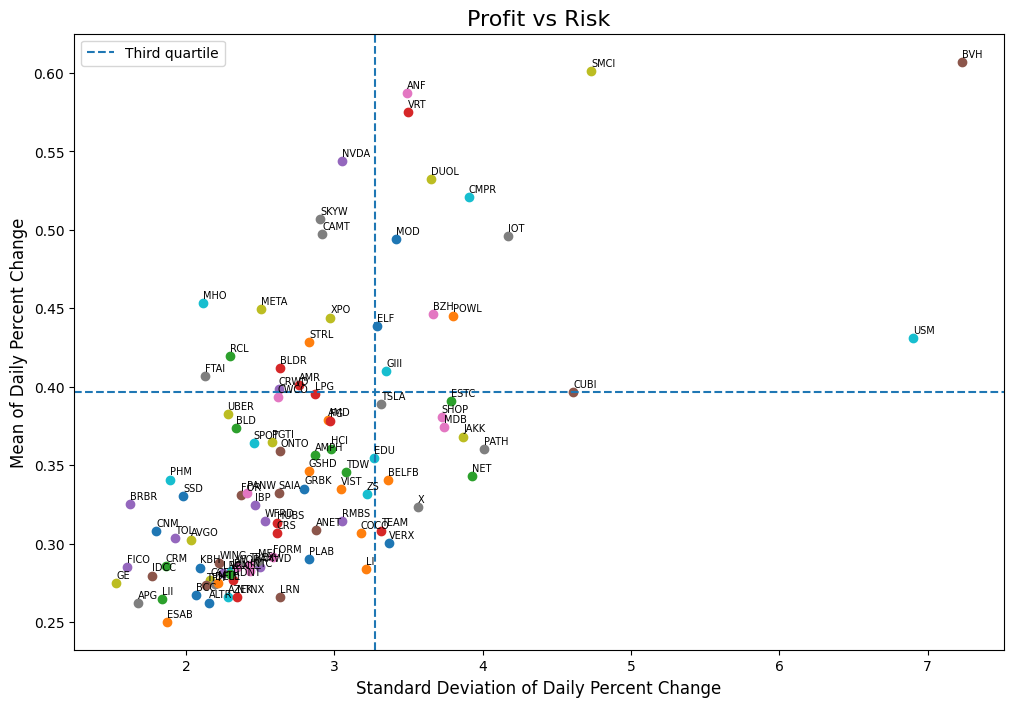

In [29]:
#Plot the mean and std of each stock 
plt.figure(figsize=(12,8))
for i in range(daily_percent_mean_std.shape[1]):
    plt.scatter(daily_percent_mean_std.iloc[1,i], daily_percent_mean_std.iloc[0,i])
    plt.annotate(daily_percent_mean_std.columns.values[i], xy=(daily_percent_mean_std.iloc[1,i], daily_percent_mean_std.iloc[0,i]+0.003),size=7)

plt.xlabel('Standard Deviation of Daily Percent Change', fontsize= 12)
plt.ylabel('Mean of Daily Percent Change', fontsize=12)
plt.title('Profit vs Risk', fontsize=16)
plt.axhline(y=mean_third_quartile,linestyle='--', label= 'Third quartile')
plt.axvline(x=std_third_quartile, linestyle='--')
plt.legend(loc='upper left')


In [30]:
# Get the top left quartitle of stocks (0-51 STD and 177-255 Mean)
top_right_quartitle= daily_percent_mean_std.iloc[:,list((daily_percent_mean_std.iloc[0,:]>=mean_third_quartile)&(daily_percent_mean_std.iloc[1,:]<=std_third_quartile))]
top_right_quartitle

,AMR,BLDR,CAMT,CRWD,FTAI,META,MHO,NVDA,RCL,SKYW,STRL,XPO
mean,0.401365,0.412008,0.497108,0.398514,0.406787,0.449598,0.453414,0.543735,0.419518,0.506747,0.428394,0.444177
std,2.760496,2.633120,2.918909,2.625170,2.126188,2.508913,2.117176,3.052564,2.298382,2.904769,2.831692,2.972626


Text(0.5, 1.0, 'High Profit, Low Risk Quadrant')

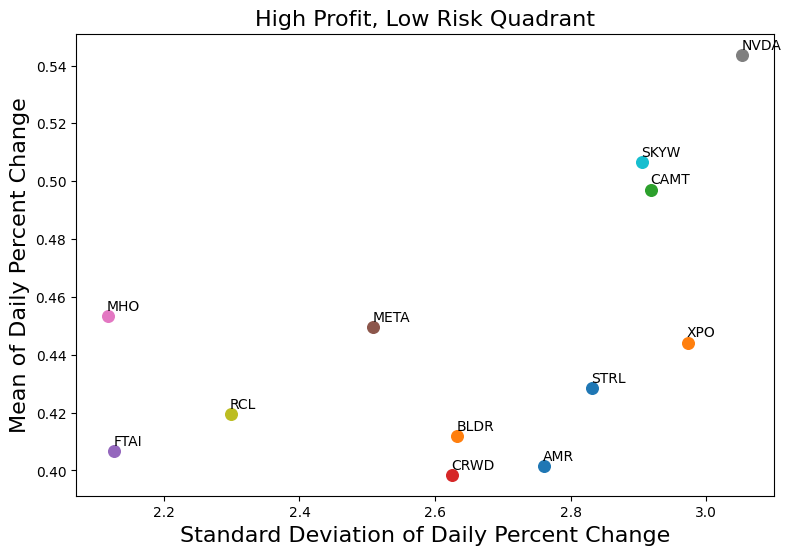

In [31]:
# Graph stocks in the top left quartitle 
plt.figure(figsize=(9,6))
for i in list(top_right_quartitle.columns.values):
    plt.scatter(daily_percent_mean_std[i].iloc[1], daily_percent_mean_std[i].iloc[0], s=70)
    plt.annotate(i, xy=(daily_percent_mean_std[i].iloc[1]-0.001, daily_percent_mean_std[i].iloc[0]+0.002), size=10)

plt.xlabel('Standard Deviation of Daily Percent Change',fontsize=16)
plt.ylabel('Mean of Daily Percent Change', fontsize=16)
plt.title('High Profit, Low Risk Quadrant', fontsize=16)

# Optional Further Analysis
If the stakeholder is interested in investing by industries, the scatter plot in this section takes the average of the mean and std by industry.  

### Data cleaning of industry names

In [32]:
#Add the industry column to the mean df and std df
daily_percent_mean_std= daily_percent_mean_std.transpose().reset_index().rename(columns={'index':'Ticker'})
daily_percent_mean_std= daily_percent_mean_std.merge(ticker_industry, how='left', on= 'Ticker')
daily_percent_mean_std.head()

,Ticker,mean,std,Industry
0,ALTR,0.262570,2.157071,Compter Sftwr-dsgn
1,AMD,0.378675,2.957375,Elec-semicon Fblss
2,AMPH,0.356345,2.870233,Medical-biomed/bth
3,AMR,0.401365,2.760496,Energy Coal
4,AMWD,0.285502,2.500714,Bldg-cnstr Prds/msc


In [33]:
#Verify the names of Industries
daily_percent_mean_std['Industry'].value_counts()

Industry
Bldg-cnstr Prds/msc       8
Bldg-rsidnt/comml         8
Comptr Sftwr-entr         6
Elec-semicndctr Eqp       4
Elec-semicon Fblss        4
Cmp Sftwr-dbase           3
Comptr Sftwr-scrity       3
Leisure-services          2
Insrnce-prp/cas/titl      2
Auto Manufacturers        2
Comptr Sftwr-fincl        2
Bldg-a/c & Heating P      2
Consumr Svc-edcation      2
Cmptr Sftwr-edu           2
Cmp-hrdwre/perip          2
Electrical Power/eqpmt    2
Cmp Sftwr-spc-entr        2
Cosmetics/persnl Cre      2
Oil&gas-intl Expl Pr      1
Steel-producers           1
Elec-semicon Mfg          1
Leisr-tys/gms/hbby        1
Elec-contract Mfg         1
Metal Proc & Fabrica      1
Retail-restaurants        1
Oil&gas-mchnry/eq         1
Mdcal-outpnt/hm Cr        1
Trnsportation-trck        1
Oil&gas-trnsprt/pip       1
Oil&gas-field Servic      1
Bldg-heavy Constr         1
Retail-internet           1
Internet-content          1
Trnsprttin-airlne         1
Elec-misc Products        1
Telcom Svc-

In [34]:
#Rewrite industries to be only the keyword before '-'
for i in range(len(daily_percent_mean_std['Industry'])):
    word = daily_percent_mean_std.iloc[i,3]
    daily_percent_mean_std.iloc[i,3]=word.split('-',1)[0]
    
#daily_percent_mean_std['Industry'].value_counts().reset_index(name='count').sort_values(by='Industry')

In [35]:
# Duplicates: ('Mdcal','Medical')
daily_percent_mean_std.loc[daily_percent_mean_std['Industry']=='Mdcal','Industry'] = 'Medical'
duplicates=['Mdcal','Medical']
#daily_percent_mean_std[daily_percent_mean_std['Industry'].isin(duplicates)]

In [36]:
# Duplicates ('Cmp Sftwr', 'Cmptr Sftwr', 'Comptr Sftwr', 'Compter Sftwr')
duplicates= ['Cmp Sftwr', 'Cmptr Sftwr', 'Comptr Sftwr', 'Compter Sftwr']
daily_percent_mean_std.loc[daily_percent_mean_std['Industry'].isin(duplicates),'Industry'] = 'Comptr Sftwr'
#daily_percent_mean_std[daily_percent_mean_std['Industry'].isin(duplicates)]

In [37]:
# Verify if Duplicates (Cmp, Compter)
duplicates= ['Cmp', 'Compter']
daily_percent_mean_std.loc[daily_percent_mean_std['Industry'].isin(duplicates),'Industry'] = 'Comptr'
#daily_percent_mean_std[daily_percent_mean_std['Industry']=='Comptr']

In [38]:
#Check for other duplicates
#daily_percent_mean_std['Industry'].value_counts().reset_index(name='count').sort_values(by='Industry')

In [39]:
# Duplciates ('Insrnce', 'Insurance') ('Leisr', 'Leisure')
duplicates = ['Leisr', 'Leisure']
daily_percent_mean_std.loc[daily_percent_mean_std['Industry'].isin(duplicates),'Industry'] = 'Leisure'
duplicates = ['Insrnce', 'Insurance']
daily_percent_mean_std.loc[daily_percent_mean_std['Industry'].isin(duplicates),'Industry'] = 'Insurance'
#daily_percent_mean_std['Industry'].value_counts().reset_index(name='count').sort_values(by='Industry')

In [40]:
#Verify duplicates ('Transport','Trnsportation','Trnsprttin')
duplicates = ['Transport','Trnsportation','Trnsprttin']
#daily_percent_mean_std[daily_percent_mean_std['Industry'].isin(duplicates)]

In [41]:
# SAIA is a trucking company, XPO is a freight transportation company SKYW is an airline leasing company
daily_percent_mean_std.loc[daily_percent_mean_std['Industry'].isin(duplicates),'Industry'] = 'Transport'
#daily_percent_mean_std[daily_percent_mean_std['Industry'].isin(duplicates)]

In [42]:
#daily_percent_mean_std['Industry'].value_counts().reset_index(name='count').sort_values(by='Industry')

In [43]:
daily_percent_mean_std.head()

,Ticker,mean,std,Industry
0,ALTR,0.262570,2.157071,Comptr Sftwr
1,AMD,0.378675,2.957375,Elec
2,AMPH,0.356345,2.870233,Medical
3,AMR,0.401365,2.760496,Energy Coal
4,AMWD,0.285502,2.500714,Bldg


In [44]:
#Create a column of the industry count
daily_percent_mean_std['Industry Count'] = daily_percent_mean_std.groupby(by='Industry')['Industry'].transform('count')
#daily_percent_mean_std

In [45]:
# Only include industries with 2 or more stocks
multiple_industries = daily_percent_mean_std[daily_percent_mean_std['Industry Count']>2]
#multiple_industries

In [46]:
#Get the mean and std by industries with 2 or more stocks
grouped_industries_mean_std =daily_percent_mean_std.groupby(by='Industry')[['mean','std']].mean().round(1).reset_index().sort_values(by='std', ascending= True)
mult_industries_mean_std=grouped_industries_mean_std[grouped_industries_mean_std['Industry'].isin(multiple_industries['Industry'])]
mult_industries_mean_std

,Industry,mean,std
5,Bldg,0.3,2.4
12,Elec,0.3,2.6
25,Retail,0.4,2.7
29,Transport,0.4,2.8
18,Leisure,0.4,2.8
16,Insurance,0.4,2.9
23,Oil&gas,0.3,2.9
8,Comptr Sftwr,0.3,3.0
7,Comptr,0.4,3.3


### Analysis 
The scatter plot to the below suggests the high-profit and low-risk industries are Retail, Transport, Leisure,  and Insurance stocks. Transport and Leisure industries have the mean and standard deviation thus the overlap. 

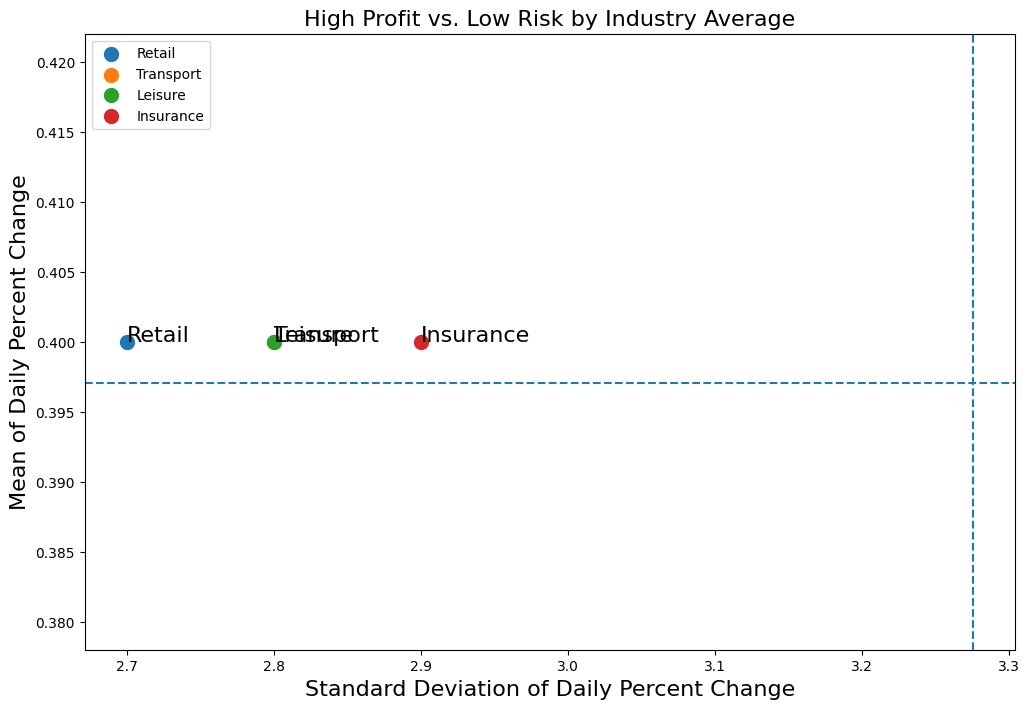

In [47]:
# Graph a scatter plot with the average of each industry 
plt.figure(figsize=(12,8))
for i in range(len(mult_industries_mean_std)):
    if (mult_industries_mean_std.iloc[i,2] < std_third_quartile) & (mult_industries_mean_std.iloc[i,1]>mean_third_quartile):
        plt.scatter(mult_industries_mean_std.iloc[i,2], mult_industries_mean_std.iloc[i,1],s=100, label=mult_industries_mean_std.iloc[i,0] )
        plt.annotate(mult_industries_mean_std.iloc[i,0], xy=(mult_industries_mean_std.iloc[i,2], mult_industries_mean_std.iloc[i,1]), size=16)

plt.xlabel('Standard Deviation of Daily Percent Change', fontsize=16)
plt.ylabel('Mean of Daily Percent Change', fontsize=16)
plt.title('High Profit vs. Low Risk by Industry Average', fontsize=16)
plt.axhline(y=mean_third_quartile,linestyle='--')
plt.axvline(x=std_third_quartile, linestyle='--')
plt.legend()
